### importing the libraries

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("/content/drive/MyDrive/Strokefaces"))


['Traning Set', 'Test Set', 'Validation Set']


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [ ]:
train_data_dir = '/content/drive/MyDrive/Strokefaces/Traning Set'
img_width, img_height = 224, 224 
batch_size = 32
validation_dir = '/content/drive/MyDrive/Strokefaces/Validation Set'


In [ ]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 2.9 MB/s 


### Image Augmentation

In [ ]:
image_size = 224

#from keras.applications import preprocess_input
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")
data_generator = ImageDataGenerator(
                                    horizontal_flip=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    validation_split=0.2)# set validation split

train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=200,
    class_mode='categorical',
    subset='training'
    )
validation_generator = data_generator.flow_from_directory(
    validation_dir,
    target_size=(image_size, image_size),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
    )

Found 1707 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


### Hyperparameters

In [ ]:
# Hyperparameters

from tensorflow.keras.optimizers import Adam, SGD
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model
from tensorflow.python.keras import optimizers


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10


In [ ]:
import math

fit_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=1)
       

Epoch 1/10
8/8 [==============================] - 362s 44s/step - loss: 1.0668 - accuracy: 0.6934 - val_loss: 0.4012 - val_accuracy: 0.8250
Epoch 2/10
8/8 [==============================] - 354s 44s/step - loss: 0.1972 - accuracy: 0.9190 - val_loss: 0.1890 - val_accuracy: 0.9667
Epoch 3/10
8/8 [==============================] - 352s 44s/step - loss: 0.1288 - accuracy: 0.9589 - val_loss: 0.2653 - val_accuracy: 0.8583
Epoch 4/10
8/8 [==============================] - 357s 44s/step - loss: 0.0822 - accuracy: 0.9681 - val_loss: 0.1194 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 362s 45s/step - loss: 0.0694 - accuracy: 0.9741 - val_loss: 0.2103 - val_accuracy: 0.8917
Epoch 6/10
8/8 [==============================] - 358s 44s/step - loss: 0.0561 - accuracy: 0.9801 - val_loss: 0.1565 - val_accuracy: 0.9250
Epoch 7/10
8/8 [==============================] - 386s 48s/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.2293 - val_accuracy: 0.8833
Epoch 8/10
8/8 [====

### **Result**

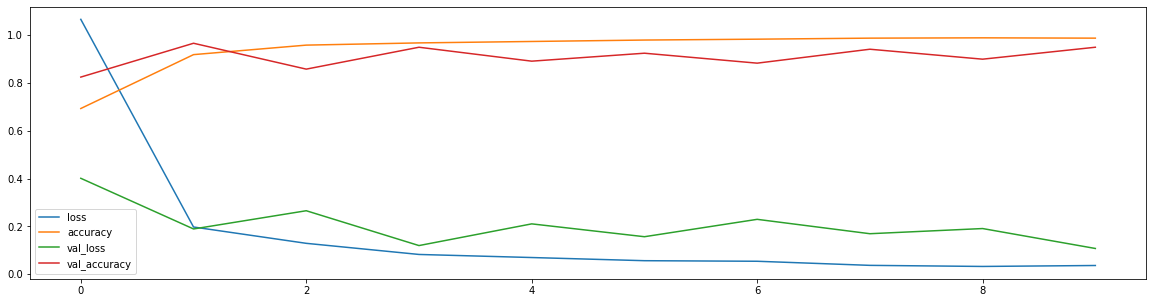

In [ ]:
pd.DataFrame(fit_history.history).plot(figsize=(20,5))
plt.show()